In [756]:
import pandas as p
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import warnings
import forestci as fci
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import RocCurveDisplay
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split




In [757]:
df = p.read_csv('/Users/vispikarkaria/Downloads/placement_post_processed_data_with_usage_cleaned.csv')
df = df.dropna()

In [758]:
##Transforming FleetID 
genres = np.unique(df['FleetID'])
genres

from sklearn.preprocessing import LabelEncoder
gle = LabelEncoder()
FleetID_labels = gle.fit_transform(df['FleetID'])
genre_mappings = {index: label for index, label in 
                  enumerate(gle.classes_)}

genre_mappings

df['FleetID_code'] = FleetID_labels
print(genre_mappings)

{0: '10101', 1: '10112', 2: '10120', 3: '10153', 4: '12005', 5: '20007', 6: '20019', 7: '30100', 8: '30101', 9: '30105', 10: '30241', 11: '30253', 12: '30257', 13: '30258', 14: '30301', 15: '35278', 16: '35404', 17: '35404_OLD'}


In [759]:
##Transforming Tire_Id 
genres = np.unique(df['Tire_Id'])
genres

from sklearn.preprocessing import LabelEncoder
gle = LabelEncoder()
Tire_Id_labels = gle.fit_transform(df['Tire_Id'])
genre_mappings = {index: label for index, label in 
                  enumerate(gle.classes_)}

genre_mappings

df['Tire_Id_code'] = Tire_Id_labels

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17]
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31]
[18, 2383, 16, 188, 16, 22, 250, 42, 79, 64, 50, 114, 25, 3, 920, 49, 18, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
4261


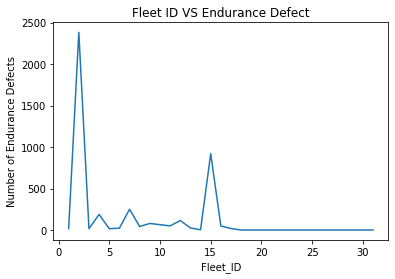

In [760]:
##Analyzing Number of Endurance defect in each fleet

MyList = df["FleetID_code"]
MyList = MyList.to_numpy()
print(np.unique(MyList))
np.count_nonzero(MyList == 4)

x_array = []
y_array= []

for i in range(1,32):
    x_array.append(i)
    count1 = np.count_nonzero(MyList == i) 
    count1 = y_array.append(count1)

print((x_array))
print(y_array)

##Plotting Fleet ID code vs the endurance defect
plt.plot(x_array, y_array)
plt.xlabel("Fleet_ID")
plt.ylabel("Number of Endurance Defects")
plt.title("Fleet ID VS Endurance Defect")
print(len(df))

In [761]:
## Training the Random Forest Method 

In [762]:
X = df[['(Casing_Mileage, Drive_Inner)', '(Casing_Mileage, Drive_Outer)', '(Casing_Mileage, Steer)', '(Casing_Mileage, Trailer_Inner)', '(Casing_Mileage, Trailer_Outer)', 'acc_CT', 'wear_CT', 'Casing_Mileage_tot', 'Casing_Age_Days', 'Pressure_avg', 'wear_rate_avg', 'roc_m_avg_cum', 'speed_filt_avg_cum', 'long_accel_filt_corrected_avg_cum', 'lat_accel_filt_avg_cum']]
y = df['end_CT']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [763]:
## Doing data balancing 
df2 = pd.concat([X_train, y_train], axis=1)

##Combining the Fleet Number of 23
df3 = pd.concat([X_test, y_test], axis=1)
print(len(df2), len(df3))

2982 1279


In [764]:
## Data balancing phase 2
print("The length of dataframe before concat is ", len(df2))

def select_balancing_method(df2, method, number_drop):
    increase_minority = 'increase_minority'
    if method == 'increase_minority':
        duplicate_y = df2[df2['end_CT']==1]
        for i in range(0,10):
            df2 = pd.concat([df2, duplicate_y], )
        print("The length of dataframe after concat is ", len(df2))

    elif method == 'decrease_majority': 
        duplicate_y = df2[df2['end_CT']==0]
        index_list = df2.index[ df2['end_CT'] == 0]
        #number_drop = int(input("Please enter the number of rows you want to delete: "))
        df2.drop(index_list[500:number_drop],0, inplace=True)
        df2.head()
        print("The length of dataframe after concat is ", len(df2))
    return df2
        
df2 = select_balancing_method(df2, method = 'decrease_majority', number_drop = 2600)
df.describe()

X_train = df2[['(Casing_Mileage, Drive_Inner)', '(Casing_Mileage, Drive_Outer)', '(Casing_Mileage, Steer)', '(Casing_Mileage, Trailer_Inner)', '(Casing_Mileage, Trailer_Outer)', 'acc_CT', 'wear_CT', 'Casing_Mileage_tot', 'Casing_Age_Days', 'Pressure_avg', 'wear_rate_avg', 'roc_m_avg_cum', 'speed_filt_avg_cum', 'long_accel_filt_corrected_avg_cum', 'lat_accel_filt_avg_cum']]
y_train = df2['end_CT']

The length of dataframe before concat is  2982
The length of dataframe after concat is  882


In [765]:
## Train the random forest

clf = RandomForestClassifier(n_estimators = 500, criterion='entropy',
                                  random_state=10)

clf.fit(X_train, y_train)
print(len(X_train), len(X_test))
y_pred = clf.predict(X_test)

882 1279


Accuracy: 0.9014855355746677
F1_score: 0.32978723404255317


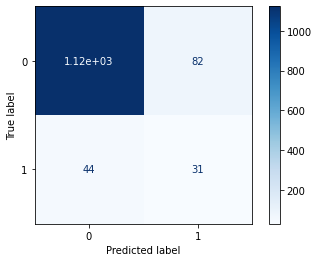

In [766]:
## Check the accuracy 
##printing the accuracy of the model
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("F1_score:", metrics.f1_score(y_test, y_pred))

#Printing the confusion matrix
disp = metrics.plot_confusion_matrix(clf, X_test, y_test, cmap="Blues", values_format='.3g')




In [767]:
# Calculating the precision 
X_test_numpy = X_test.to_numpy()
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.93      0.95      1204
           1       0.27      0.41      0.33        75

    accuracy                           0.90      1279
   macro avg       0.62      0.67      0.64      1279
weighted avg       0.92      0.90      0.91      1279



[0.06298343 0.05840782 0.07514327 0.02727839 0.02718474 0.01411433
 0.00768895 0.19565174 0.12125552 0.08056082 0.07430599 0.06617251
 0.06359495 0.06112628 0.06453127]


Text(0.5, 1.0, 'Importance of Various Input Parameters')

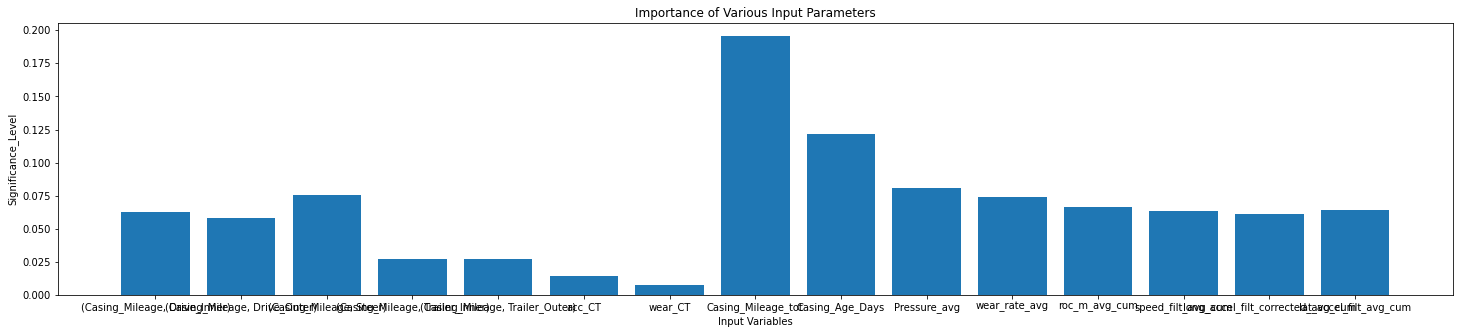

In [768]:
## Checking the feature importance
importance = clf.feature_importances_
print(importance)
plt.figure(figsize=(25, 5))
X_importance = ['(Casing_Mileage, Drive_Inner)', '(Casing_Mileage, Drive_Outer)', '(Casing_Mileage, Steer)', '(Casing_Mileage, Trailer_Inner)', '(Casing_Mileage, Trailer_Outer)', 'acc_CT', 'wear_CT', 'Casing_Mileage_tot', 'Casing_Age_Days', 'Pressure_avg', 'wear_rate_avg', 'roc_m_avg_cum', 'speed_filt_avg_cum', 'long_accel_filt_corrected_avg_cum', 'lat_accel_filt_avg_cum']
plt.bar(X_importance, importance)
plt.ylabel("Significance_Level")
plt.xlabel("Input Variables")
plt.title("Importance of Various Input Parameters")

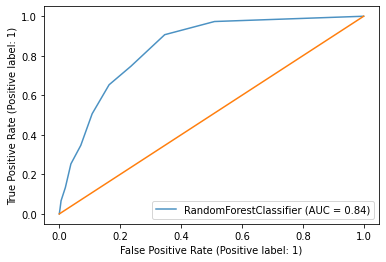

In [769]:
## Plotting SVC vs Random forest ROC plot 
rfc = RandomForestClassifier(n_estimators=10, random_state=42)
rfc.fit(X_train, y_train)
ax = plt.gca()
rfc_disp = RocCurveDisplay.from_estimator(rfc, X_test, y_test, ax=ax, alpha=0.8)
#svc_disp = RocCurveDisplay.from_estimator(svc, X_test, y_test)
x_axis1 = np.linspace(0,1,10)
plt.plot(x_axis1, x_axis1)
#svc_disp.plot(ax=ax, alpha=0.8)
plt.show()

[0.02044661 0.01958729 0.01941695 ... 0.01896213 0.01583546 0.02099061]


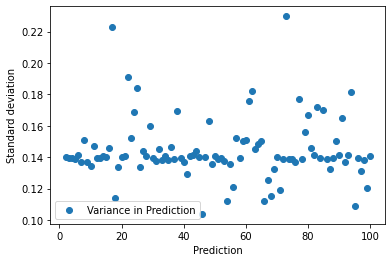

In [770]:
## Calculating the variance
Defect_Variance = fci.random_forest_error(clf, X_train,
                                             X_test)
print(Defect_Variance)
x_Scale = np.linspace(1,2113,2113)
fig, ax = plt.subplots(1)
ax.scatter(x_Scale[1:100],
           np.sqrt(Defect_Variance[1:100]),
           label='Variance in Prediction')



ax.set_xlabel('Prediction')
ax.set_ylabel('Standard deviation')
plt.legend()
plt.show()

In [771]:
## Calculating confidence bounds

import scipy
def conf_int(mean, variance, confidence):
    upper_bound_array = []
    lower_bound_array = []
    st_dev = np.sqrt(variance)
    n = int(len(mean))
    count = 0
    for x in range(0, n):
        h = (st_dev[x]*scipy.stats.t.ppf((1-confidence)/2., n-1))/2
        upper_bound = float(mean[x])+float(h)
        lower_bound = float(mean[x])-float(h)
        #print(upper_bound, lower_bound)
        upper_bound_array.append(upper_bound)
        lower_bound_array.append(lower_bound)
        count = count + 1
    
    
    return upper_bound_array, mean, lower_bound_array, count


y_pred = clf.predict_proba(X_test)
y_pred = y_pred[:,1]
print(len(y_pred), len(Defect_Variance))
Defect_Variance = fci.random_forest_error(clf, X_train,
                                             X_test)
y_ub, y, y_lb, c = conf_int(y_pred, Defect_Variance, 0.95)


1279 1279


In [772]:
df.describe()

,Unnamed: 0,Life_Num,"(Casing_Mileage, Drive_Inner)","(Casing_Mileage, Drive_Outer)","(Casing_Mileage, Steer)","(Casing_Mileage, Trailer_Inner)","(Casing_Mileage, Trailer_Outer)",acc_CT,wear_CT,end_CT,...,roc_m_avg_cum,roc_m_std_cum,speed_filt_avg_cum,speed_filt_std_cum,long_accel_filt_corrected_avg_cum,long_accel_filt_corrected_std_cum,lat_accel_filt_avg_cum,lat_accel_filt_std_cum,FleetID_code,Tire_Id_code
count,4261.000000,4261.000000,4261.000000,4261.000000,4261.000000,4261.000000,4261.000000,4261.000000,4261.000000,4261.000000,...,4261.000000,4261.000000,4261.000000,4261.000000,4261.000000,4261.000000,4261.000000,4261.000000,4261.000000,4261.000000
mean,2263.597982,1.582258,98961.562763,98467.641494,74230.706794,24225.525949,25341.964581,0.266604,0.664163,0.058906,...,1439.259606,214.426028,104.291427,13.584788,0.000049,0.181212,0.153853,0.274151,6.197606,1277.051396
std,1286.441475,0.666153,141820.861377,140226.480893,79911.865516,56248.919035,59982.728802,0.442236,0.472338,0.235477,...,38.271122,33.866947,2.884765,1.949147,0.001106,0.045777,0.027099,0.042856,5.523947,722.977636
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,248.961747,34.372348,18.228884,2.794122,-0.004163,0.030715,0.023652,0.044741,0.000000,0.000000
25%,1121.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1430.539938,187.537146,104.062961,12.801477,-0.000714,0.133814,0.132733,0.231209,2.000000,655.000000
50%,2276.000000,1.000000,0.000000,0.000000,50408.101000,0.000000,0.000000,0.000000,1.000000,0.000000,...,1439.499343,215.832276,104.665319,13.272721,0.000377,0.195990,0.157364,0.279734,2.000000,1315.000000
75%,3371.000000,2.000000,198990.960000,201989.070000,150811.712700,0.000000,0.000000,1.000000,1.000000,0.000000,...,1458.029194,232.076652,105.200563,13.826994,0.000747,0.204284,0.171379,0.302189,12.000000,1886.000000
max,4455.000000,5.000000,835616.810000,703088.480000,379317.070000,436866.945900,407751.670000,1.000000,1.000000,1.000000,...,1477.804469,402.744194,111.646461,26.834815,0.006207,0.366687,0.280622,0.398578,17.000000,2518.000000


In [773]:
array_defect_miles = []
space_range = np.linspace(0, 1000000, 1000)
np.shape((space_range))
X_cont_array = []
Total_miles = 700000
for miles in space_range: 
    if miles<Total_miles/3:
        X_cont = [miles, miles, 74863.205124,
        24431.944631, 25557.896113, 1, 1,
        miles, 1000, 110, 0.5,
        1439.210623, 104.295415, 0.000053, 0.153883]
    
    elif miles >=Total_miles/3 and miles < (Total_miles*2)/3:
        X_cont = [miles, miles, 74863.205124,
        24431.944631, 25557.896113, 1, 1,
        miles, 1000, 110, 0.5,
        1439.210623, 104.295415, 0.000053, 0.153883]   

    elif miles >=(Total_miles*2)/3:
        X_cont = [miles, miles, 74863.205124,
        24431.944631, 25557.896113, 1, 1,
        miles, 1000, 110, 0.5,
        1439.210623, 104.295415, 0.000053, 0.153883] 



    X_cont = np.reshape(X_cont, [1,-1])
    X_cont_answer = clf.predict_proba(X_cont)
    X_answer = X_cont_answer[:,1]
    array_defect_miles.append(X_answer)
    X_cont = X_cont.flatten()
    X_cont_array.append(X_cont)

In [774]:
X_cont_array = pd.DataFrame(data = X_cont_array)
#X_test = X_train
Defect_Variance = fci.random_forest_error(clf, X_cont_array, X_test)
print(len(array_defect_miles), len(Defect_Variance))
y_ub, y, y_lb, c = conf_int(array_defect_miles, Defect_Variance, 0.8)
print(len(y_ub))

1000 1279
1000


Text(0, 0.5, 'Probability of failure')

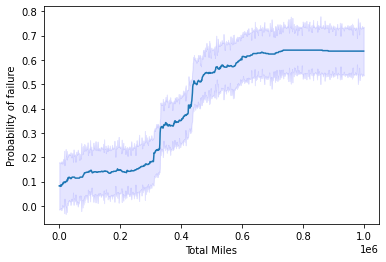

In [775]:
fig, ax = plt.subplots()
space_range = np.linspace(0, 1000000, 1000)

ax.plot(space_range, array_defect_miles)
ax.fill_between(space_range, y_ub, y_lb, color='b', alpha=.1)
plt.xlabel("Total Miles")
plt.ylabel("Probability of failure")

Text(0, 0.5, 'Probability of failure')

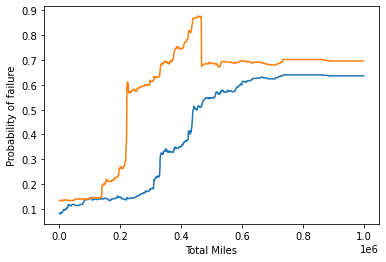

In [776]:
#X = df[['Life_Num', 'acc_CT', 'Casing_Mileage_Drive_Inner', 'Casing_Mileage_Drive_Outer', 'Casing_Mileage_Steer', 'Casing_Mileage_Trailer_Inner', 'Casing_Mileage_Trailer_Outer', 'wear_CT', 'Pressure_avg', 'wear_rate_avg', 'Casing_Mileage_tot', 'FleetID_code', 'Casing_Age_Days']]
array_defect_miles1 = []
space_range1 = np.linspace(0, 1000000, 1000)
np.shape((space_range))
count = 0 
X_cont_array_1 = []
for miles in space_range1: 

    if miles<Total_miles/5:
        X_cont = [98961.562763, 98467.641494, miles,
        24431.944631, 25557.896113, 1, 1,
        miles, 1000, 110, 0.5,
        1439.210623, 104.295415, 0.000053, 0.153883] 

        X_cont = np.reshape(X_cont, [1,-1])
        X_cont_answer = clf.predict_proba(X_cont)
        X_answer = X_cont_answer[:,1]
        array_defect_miles1.append(X_answer)
        count = count + 1
        X_cont = X_cont.flatten()
        X_cont_array_1.append(X_cont)


    elif miles>=Total_miles/5 and miles<Total_miles/3:
        X_cont = [98961.562763, 98467.641494, miles,
        24431.944631, 25557.896113, 1, 1,
        miles, 1000, 110, 0.5,
        1439.210623, 104.295415, 0.000053, 0.153883] 
    
        X_cont = np.reshape(X_cont, [1,-1])
        X_cont_answer = clf.predict_proba(X_cont)
        X_answer = X_cont_answer[:,1]
        array_defect_miles1.append(X_answer*1.3)
        count = count + 1
        X_cont = X_cont.flatten()
        X_cont_array_1.append(X_cont)

    elif miles >=Total_miles/3 and miles < (Total_miles*2)/3:
        X_cont = [98961.562763, 98467.641494, miles,
        24431.944631, 25557.896113, 1, 1,
        miles, 1000, 110, 0.5,
        1439.210623, 104.295415, 0.000053, 0.153883]    

        X_cont = np.reshape(X_cont, [1,-1])
        X_cont_answer = clf.predict_proba(X_cont)
        X_answer = X_cont_answer[:,1]
        array_defect_miles1.append(X_answer*1.3)
        count = count + 1
        X_cont = X_cont.flatten()
        X_cont_array_1.append(X_cont)

    elif miles >=(Total_miles*2)/3:
        X_cont = [98961.562763, 98467.641494, miles,
        24431.944631, 25557.896113, 1, 1,
        miles, 1000, 110, 0.5,
        1439.210623, 104.295415, 0.000053, 0.153883]  

        X_cont = np.reshape(X_cont, [1,-1])
        X_cont_answer = clf.predict_proba(X_cont)
        X_answer = X_cont_answer[:,1]
        array_defect_miles1.append(X_answer)
        count = count + 1
        X_cont = X_cont.flatten()
        X_cont_array_1.append(X_cont)

        



space_range1 = np.linspace(0, 1000000, 1000)

plt.plot(space_range, array_defect_miles)
plt.plot(space_range1, array_defect_miles1)
plt.xlabel("Total Miles")
plt.ylabel("Probability of failure")


In [777]:
X_cont_array_1 = pd.DataFrame(data = X_cont_array_1)
#X_test = X_train
Defect_Variance_1 = fci.random_forest_error(clf, X_cont_array_1, X_test)
print(len(array_defect_miles1), len(Defect_Variance_1))
y_ub_1, y_1, y_lb_1, c_1 = conf_int(array_defect_miles1, Defect_Variance_1, 0.8)
print(len(y_ub_1))

1000 1279
1000


Text(0, 0.5, 'Probability of failure')

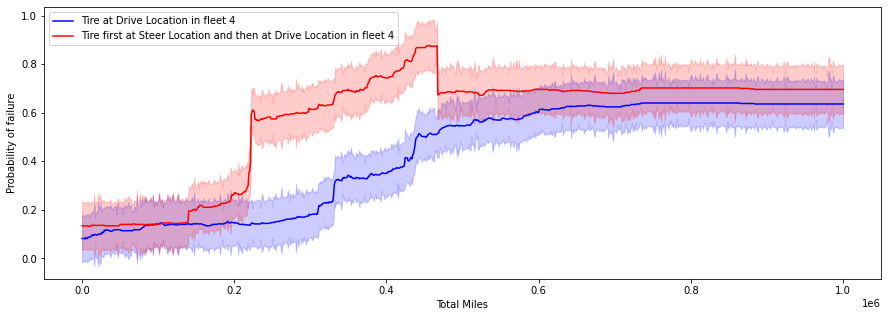

In [778]:
## Creating Plot for tire failure according to location 
from matplotlib.pyplot import figure
fig, ax = plt.subplots(figsize=(15, 5))

#figure(figsize=(15, 5), dpi=80)
ax.plot(space_range, array_defect_miles, "-b", label = "Tire at Drive Location in fleet 4")
ax.fill_between(space_range, y_ub, y_lb, color='b', alpha=.2)
ax.plot(space_range1, array_defect_miles1, "-r", label = "Tire first at Steer Location and then at Drive Location in fleet 4")
ax.fill_between(space_range1, y_ub_1, y_lb_1, color='r', alpha=.2)

ax.legend(loc="upper left")
plt.xlabel("Total Miles")
plt.ylabel("Probability of failure")